# Loan Payment

We have locan payment dataset contains information around 500 people.
<br>We would like to perform classification on Loan_status variable that contains three categories namely PAIDOFF, COLLETION AND COLLECTION_PAIDOFF. 
<br><br>The PAIDOFF category is all about loan paid off by the customers.
<br>The COLLECTION is all about the loan is yet to be paid off so bank is collecting money from those customers who seem to be unwilling to repay the loan amount; these customers are apprehended to be defaulters.
<br>The next and last category is COLLECTION_PAIDOFF that states that the loan amount was repaid by the customers after conducting Collection drive.

<br>The objective is to Classify customers into any of the given categories.
<br>This analysis will generate valuable insights for banks to consider which customers they will provide loan to.



### The Loan Payment dataset contains these attributes:

1.	**Loan_id**        A unique loan number assigned to each loan customers.
2.	**loan_status**    Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts.
3.	**Principal**	   Basic principal loan amount at the origination terms, could be weekly (7 days), biweekly, and monthly payoff schedule.
4.	**effective_date** When the loan got originated and took effects.
5.	**due_date**	   Since it’s one-time payoff schedule, each loan has one single due date.
6.	**paidoff_time**   The actual time a customer pays off the loan.
7.	**pastdue_days**   How many days a loan has been past due.
8.	**age**	           Customer's age.
9.	**education**	   Customer's education details.
10.	**Gender**		   Gender.


In [233]:
#Load dependencies
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

## 1. Loading the data

The first step is to load the data we're working with into a pandas DatFrame.



In [283]:
#loading and showing head data
df = pd.read_csv('data.csv', na_values=['NA'], parse_dates=['effective_date','due_date','paid_off_time'])
df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null datetime64[ns]
due_date          500 non-null datetime64[ns]
paid_off_time     400 non-null datetime64[ns]
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 43.0+ KB


## 2. Understanding and cleaning the data

The dataset contains some missing and wrong-formatted data which has to be cleaned up first.<br><br>Generally, we're looking to answer the following questions:<br>
**Is there anything wrong with the data?**<br>
**Are there any quirks with the data?**<br>
**Do we need to fix or remove any of the data?**<br><br>

In [284]:
#Change column names to lower case.
df.columns = df.columns.str.lower()

#Remove time from past_due_days column
df.paid_off_time = df.paid_off_time.dt.normalize()

#Missing past_due_days values
df.past_due_days.fillna(((df.paid_off_time - df.due_date).dt.days), inplace=True)

#Using proper data types 
df.past_due_days = df.past_due_days.astype(int)
df.age = df.age.astype(int)
df[['loan_status','education', 'gender']] = df[['loan_status','education', 'gender']].apply(lambda x: x.astype('category'))


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
loan_id           500 non-null object
loan_status       500 non-null category
principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null datetime64[ns]
due_date          500 non-null datetime64[ns]
paid_off_time     400 non-null datetime64[ns]
past_due_days     500 non-null int32
age               500 non-null int32
education         500 non-null category
gender            500 non-null category
dtypes: category(3), datetime64[ns](3), int32(2), int64(2), object(1)
memory usage: 29.3+ KB


In [238]:
df.head(5)

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,-23,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,-12,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,-15,28,college,female


## 3. Pandas Profiling

Generates profile reports from a pandas DataFrame.<br><br>For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:<br>
**Essentials:** type, unique values, missing values <br>
**Quantile statistics:** like minimum value, Q1, median, Q3, maximum, range, interquartile range <br>
**Descriptive statistics:** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness <br>
**Correlations:** highlighting of highly correlated variables, Spearman and Pearson matrixes <br>
**Most frequent values** <br>
**Histogram**<br><br>

In [89]:
#Generate profile reports
profileReport = pdp.ProfileReport(df)
#Import profile report
profileReport.to_file(outputfile="profile.html")
#profileReport

## 4. Distribution of data

it's always a good idea to look at the distribution of our data — especially the outliers.<br>
Let's start by printing out some summary statistics about the data set.<br><br>

In [239]:
df.describe()

,principal,terms,past_due_days,age
count,500.000000,500.000000,500.000000,500.000000
mean,943.200000,22.824000,12.692000,31.116000
std,115.240274,8.000064,26.891699,6.084784
min,300.000000,7.000000,-28.000000,18.000000
25%,1000.000000,15.000000,-1.000000,27.000000
50%,1000.000000,30.000000,0.000000,30.000000
75%,1000.000000,30.000000,12.000000,35.000000
max,1000.000000,30.000000,76.000000,51.000000


### Let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will use the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows


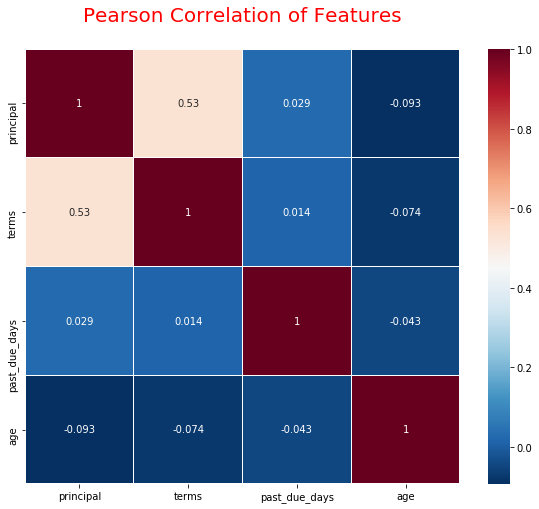

In [241]:
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', y=1.05, size=20, color='R')
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu_r, linecolor='white', annot=True)
plt.show()

<br>
## 5. Exploratory data analysis

<br>Data cleaning step is completed now we can start analyzing the data.<br>Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. This is the stage where we plot all the data in as many ways as possible.<br><br>
# 5.1 Loan Status
## 5.1.1 Find number of customers in each category

In [242]:
loanStatus = df.groupby(['loan_status'])['loan_id'].count()
loanStatus

loan_status
COLLECTION            100
COLLECTION_PAIDOFF    100
PAIDOFF               300
Name: loan_id, dtype: int64

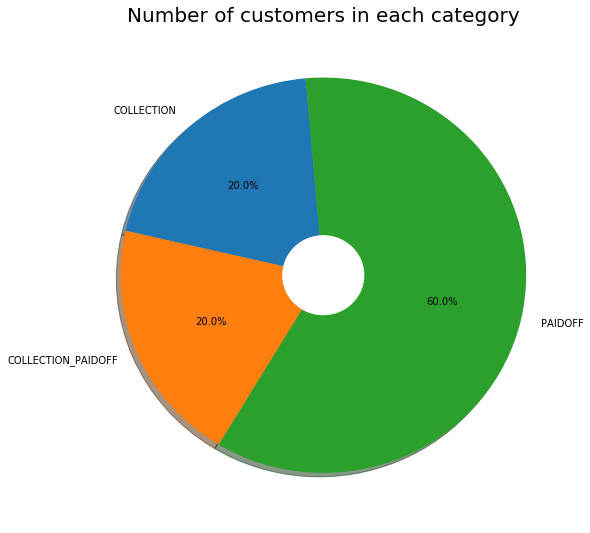

In [243]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(loanStatus, labeldistance=1.1, labels=loanStatus.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Number of customers in each category", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))
plt.show()

### 60% of customer loans are paid back while 20% is yet to be paid off.<br><br> 

## 5.1.2 Loan status w.r.t. loan amount

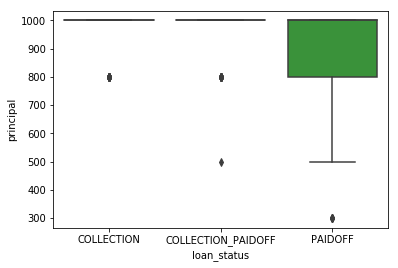

In [244]:
sns.boxplot(x='loan_status', y='principal', data=df)
plt.show()

## 5.1.3 Loan status w.r.t. customer's age

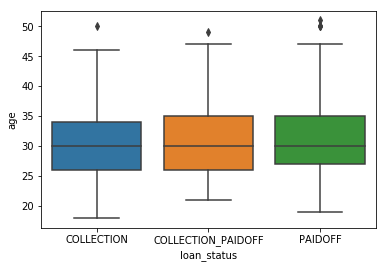

In [245]:
sns.boxplot(x='loan_status', y='age', data=df)
plt.show()

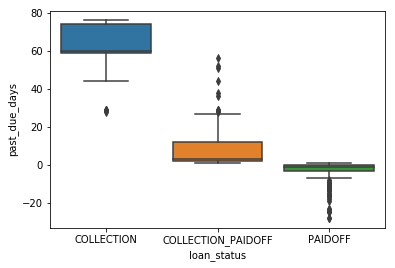

In [246]:
sns.boxplot(x='loan_status', y='past_due_days', data=df)
plt.show()

## 5.1.4 Loan count and status w.r.t. gender

In [247]:
loanCountsGender = df.groupby('gender')['gender'].count()
loanCountsGender

gender
female     77
male      423
Name: gender, dtype: int64

In [248]:
loanStatusGender = df.groupby(['loan_status','gender'])['gender'].count().unstack(level=1)
loanStatusGender

gender,female,male
loan_status,,
COLLECTION,10,90
COLLECTION_PAIDOFF,14,86
PAIDOFF,53,247


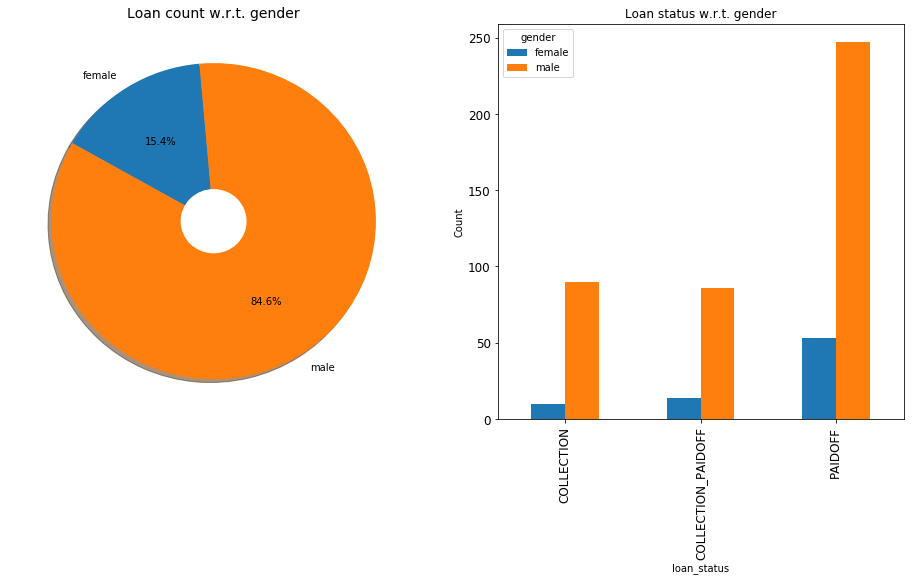

In [249]:
fig = plt.figure(figsize=[16, 16])
ax = fig.add_subplot(221)
ax.pie(loanCountsGender, labeldistance=1.1, labels=loanCountsGender.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Loan count w.r.t. gender", fontsize=14);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_ylabel('Count')
loanStatusGender.plot(kind='bar', ax=ax2, title ="Loan status w.r.t. gender",  legend=True, fontsize=12)
plt.show()

## 5.1.5 Loan count and status w.r.t. education qualification

In [250]:
loanCountsEducation = df.groupby('education')['education'].count()
loanCountsEducation

education
Bechalor                 67
High School or Below    209
Master or Above           4
college                 220
Name: education, dtype: int64

In [251]:
loanStatusEducation = df.groupby(['loan_status','education'])['education'].count().unstack(level=1)
loanStatusEducation

education,Bechalor,High School or Below,Master or Above,college
loan_status,,,,
COLLECTION,11.0,49.0,1.0,39.0
COLLECTION_PAIDOFF,15.0,37.0,NaN,48.0
PAIDOFF,41.0,123.0,3.0,133.0


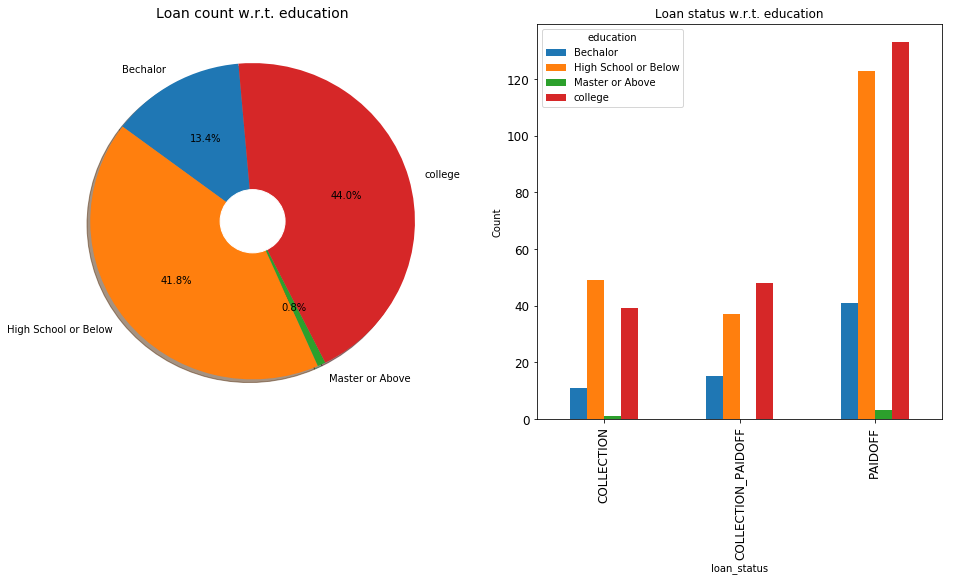

In [252]:
fig = plt.figure(figsize=[16, 16])
ax = fig.add_subplot(221)
ax.pie(loanCountsEducation, labeldistance=1.1, labels=loanCountsEducation.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Loan count w.r.t. education", fontsize=14);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_ylabel('Count')
loanStatusEducation.plot(kind='bar', ax=ax2, title ="Loan status w.r.t. education",  legend=True, fontsize=12)
plt.show()

# <br>

# 6. Logistic Model Machine Learning

In [285]:
#Preparing dataset
df.drop(columns=['effective_date','due_date','paid_off_time'], inplace=True)
df.loan_status = df.loan_status.astype('category').cat.codes
dfX = pd.get_dummies(df, columns=['education','gender'])
dfX.drop(columns=['loan_id','loan_status'], inplace=True)

In [286]:
from sklearn.cross_validation import train_test_split
y = df.loan_status
X = dfX
#Splitting the data into train and test with 70:30 ratio
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30)

In [287]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logReg = LogisticRegression(C=.1)

#Fitting the model with train data
logReg.fit(xTrain, yTrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [288]:
#Applying trained model on test and train data
yLogPredTest = logReg.predict(xTest)
yLogPredTraing = logReg.predict(xTrain)

In [289]:
from sklearn import metrics
#Comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(yTest, yLogPredTest)

0.9066666666666666

In [290]:
#Comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(yTrain, yLogPredTraing)

0.9371428571428572

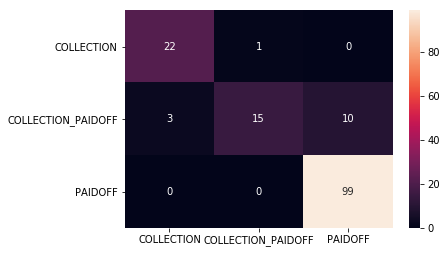

In [291]:
#Creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(yTest, yLogPredTest)
sns.heatmap(conf,xticklabels=['COLLECTION','COLLECTION_PAIDOFF','PAIDOFF'],yticklabels=['COLLECTION','COLLECTION_PAIDOFF', 'PAIDOFF'],annot=True, fmt="d")

### Parveen Dala<br>+91 904 141 1410<br>dParveen94@gmail.com